# Assignment 4 Naive Bayes Classifier without Libraries
### Name: Tanmay Walke
### Date: 13 Feb 2025
### Class: TY-CSE(AI)
### Roll No.: 65

## Import Libraries

In [82]:
import random
import math
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris



## Importing Dataset

In [83]:
df = pd.read_csv('iris.csv')

## Data Analysis

In [84]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [87]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [88]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Naive Bayes without libraries

In [ ]:
def load_dataset():
    dataset = []
    with open('iris.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            dataset.append(row)
    return dataset


def train_test_split(dataset, test_size=0.4):
    random.shuffle(dataset)
    test_size = int(len(dataset) * test_size)
    test_set = dataset[:test_size]
    train_set = dataset[test_size:]
    return train_set, test_set


def summarize_by_class(dataset):
    summaries = {}

    for i in range(len(dataset)):
        row = dataset[i]
        class_value = row[-1]

        if class_value not in summaries:
            summaries[class_value] = {'count': 0, 'mean': [], 'variance': []}

        summaries[class_value]['count'] += 1

        for j in range(len(row) - 1):
            if len(summaries[class_value]['mean']) <= j:
                summaries[class_value]['mean'].append(0.0)
                summaries[class_value]['variance'].append(0.0)
            summaries[class_value]['mean'][j] += float(row[j])

    for class_value, stats in summaries.items():
        for i in range(len(stats['mean'])):
            stats['mean'][i] /= stats['count']

    for i in range(len(dataset)):
        row = dataset[i]
        class_value = row[-1]
        for j in range(len(row) - 1):
            summaries[class_value]['variance'][j] += (float(row[j]) - summaries[class_value]['mean'][j]) ** 2

    for class_value, stats in summaries.items():
        for i in range(len(stats['variance'])):
            stats['variance'][i] /= stats['count']

    return summaries


def gaussian_probability(x, mean, variance):
    x = float(x)
    exponent = math.exp(-(x - mean) ** 2 / (2 * variance))
    return (1 / (math.sqrt(2 * math.pi * variance))) * exponent


def calculate_class_probabilities(summaries, input_data):
    probabilities = {}
    total_rows = sum([stats['count'] for stats in summaries.values()])

    for class_value, stats in summaries.items():
        probabilities[class_value] = stats['count'] / total_rows

        for i in range(len(input_data)):
            mean = stats['mean'][i]
            variance = stats['variance'][i]
            probabilities[class_value] *= gaussian_probability(input_data[i], mean, variance)

    return probabilities


def predict(summaries, input_data):
    probabilities = calculate_class_probabilities(summaries, input_data)
    best_class = None
    best_prob = -1

    for class_value, prob in probabilities.items():
        if best_class is None or prob > best_prob:
            best_prob = prob
            best_class = class_value

    return best_class


def confusion_matrix(true_labels, predicted_labels, classes):
    # Initialize the confusion matrix with zeros
    cm = {class_value: {cls: 0 for cls in classes} for class_value in classes}

    # Populate the confusion matrix
    for true, predicted in zip(true_labels, predicted_labels):
        cm[true][predicted] += 1
    
    return cm


def classification_report(true_labels, predicted_labels, classes):
    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, classes)
    
    # Initialize variables for metrics
    report = {}

    for class_value in classes:
        TP = cm[class_value][class_value]
        FP = sum(cm[other][class_value] for other in classes if other != class_value)
        FN = sum(cm[class_value][other] for other in classes if other != class_value)
        TN = sum(cm[other][other] for other in classes if other != class_value)

        # Precision, Recall, and F1-Score calculations
        precision = TP / (TP + FP) if TP + FP > 0 else 0
        recall = TP / (TP + FN) if TP + FN > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0

        # Accuracy calculation
        accuracy = (TP + TN) / (TP + TN + FP + FN) if TP + TN + FP + FN > 0 else 0
        
        # Add metrics to the report
        report[class_value] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'accuracy': accuracy
        }

    return report


def evaluate_algorithm(train_set, test_set):
    summaries = summarize_by_class(train_set)
    correct = 0
    actual_labels = []
    predicted_labels = []

    # Extract unique class labels from the dataset
    classes = list(set([row[-1] for row in train_set]))

    print(f"{'Sepal Length':<20}{'Sepal Width':<20}{'Petal Length':<20}{'Petal Width':<20}{'Actual Class':<20}{'Predicted Class':<20}{'Probability':<20}")
    print("="*135)

    for row in test_set:
        features = row[:-1]
        actual = row[-1]
        actual_labels.append(actual)

        prediction = predict(summaries, features)
        predicted_labels.append(prediction)

        probabilities = calculate_class_probabilities(summaries, features)
        predicted_prob = probabilities.get(prediction, 0)

        print(f"{row[0]:<20}{row[1]:<20}{row[2]:<20}{row[3]:<20}{actual:<20}{prediction:<20}{1 - predicted_prob:<20.4f}")

        if prediction == actual:
            correct += 1

    accuracy = correct / len(test_set) * 100

    # Calculate and print confusion matrix and classification report
    cm = confusion_matrix(actual_labels, predicted_labels, classes)
    print_confusion_matrix(cm)
    
    report = classification_report(actual_labels, predicted_labels, classes)
    print_classification_report(report)

    return accuracy


def print_confusion_matrix(cm):
    # Print the confusion matrix in a readable format
    print("\n\nConfusion Matrix:")
    print("\t\t" + "\t".join(str(i) for i in cm.keys()))
    for class_value, values in cm.items():
        print(f"{class_value}\t" + "\t\t".join(str(v) for v in values.values()))


def print_classification_report(report):
    # Print the classification report in a readable format
    print("\n\n\nClassification Report:")
    print("Class\t\t\tPrecision\tRecall\tF1-Score\tAccuracy")
    for class_value, metrics in report.items():
        print(f"{class_value}\t\t{metrics['precision']:.2f}\t\t{metrics['recall']:.2f}\t{metrics['f1_score']:.2f}\t\t{metrics['accuracy']:.2f}")


def main():
    dataset = load_dataset() 
    train_set, test_set = train_test_split(dataset)
    accuracy = evaluate_algorithm(train_set, test_set)
    print(f"\n\nAccuracy = {accuracy:.2f}%")

if __name__ == "__main__":
    main()


Sepal Length        Sepal Width         Petal Length        Petal Width         Actual Class        Predicted Class     Probability         
39                  4.4                 3.0                 1.3                 Iris-setosa         Iris-setosa         0.9948              
30                  4.7                 3.2                 1.6                 Iris-setosa         Iris-setosa         0.9626              
43                  4.4                 3.2                 1.3                 Iris-setosa         Iris-setosa         0.9944              
80                  5.7                 2.6                 3.5                 Iris-versicolor     Iris-versicolor     0.9995              
136                 7.7                 3.0                 6.1                 Iris-virginica      Iris-virginica      0.9996              
40                  5.1                 3.4                 1.5                 Iris-setosa         Iris-setosa         0.9518              
149          

# With Libraries

In [92]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data 
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))




Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [93]:
print(f"{'Sepal Length':<15}{'Sepal Width':<15}{'Petal Length':<15}{'Petal Width':<15}{'Actual Class':<20}{'Predicted Class':<20}{'Probability':<20}")
print("="*120)

y_prob = model.predict_proba(X_test)

for i in range(len(y_test)):
    actual_class = iris.target_names[y_test[i]]
    predicted_class = iris.target_names[y_pred[i]]
    predicted_prob = y_prob[i][y_pred[i]]
    print(f"{X_test[i][0]:<15.4f}{X_test[i][1]:<15.4f}{X_test[i][2]:<15.4f}{X_test[i][3]:<15.4f}{actual_class:<20}{predicted_class:<20}{predicted_prob:.4f}")


Sepal Length   Sepal Width    Petal Length   Petal Width    Actual Class        Predicted Class     Probability         
6.1000         2.8000         4.7000         1.2000         versicolor          versicolor          0.9956
5.7000         3.8000         1.7000         0.3000         setosa              setosa              1.0000
7.7000         2.6000         6.9000         2.3000         virginica           virginica           1.0000
6.0000         2.9000         4.5000         1.5000         versicolor          versicolor          0.9776
6.8000         2.8000         4.8000         1.4000         versicolor          versicolor          0.8700
5.4000         3.4000         1.5000         0.4000         setosa              setosa              1.0000
5.6000         2.9000         3.6000         1.3000         versicolor          versicolor          1.0000
6.9000         3.1000         5.1000         2.3000         virginica           virginica           1.0000
6.2000         2.2000  

## Confusion matrix plot

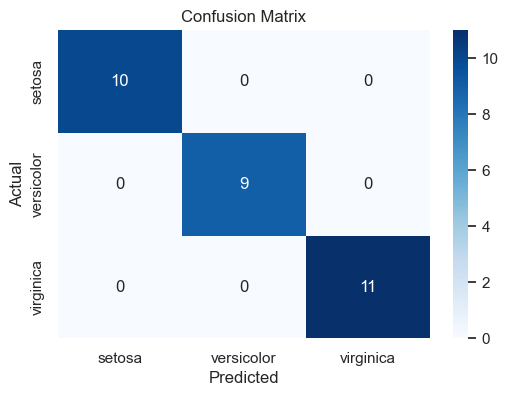

In [94]:

# Confusion matrix
cmm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cmm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Confusion Matrix :-
# First row (for Iris-setosa):

# 10: The number of times the model correctly predicted Iris-setosa.
# 0: The number of times the model incorrectly predicted Iris-versicolor when the true species was Iris-setosa.
# 0: The number of times the model incorrectly predicted Iris-virginica when the true species was Iris-setosa.
# Second row (for Iris-versicolor):

# 0: The number of times the model incorrectly predicted Iris-setosa when the true species was Iris-versicolor.
# 9: The number of times the model correctly predicted Iris-versicolor.
# 0: The number of times the model incorrectly predicted Iris-virginica when the true species was Iris-versicolor.
# Third row (for Iris-virginica):

# 0: The number of times the model incorrectly predicted Iris-setosa when the true species was Iris-virginica.
# 0: The number of times the model incorrectly predicted Iris-versicolor when the true species was Iris-virginica.
# 11: The number of times the model correctly predicted Iris-virginica.

# Visualization

### Histogram

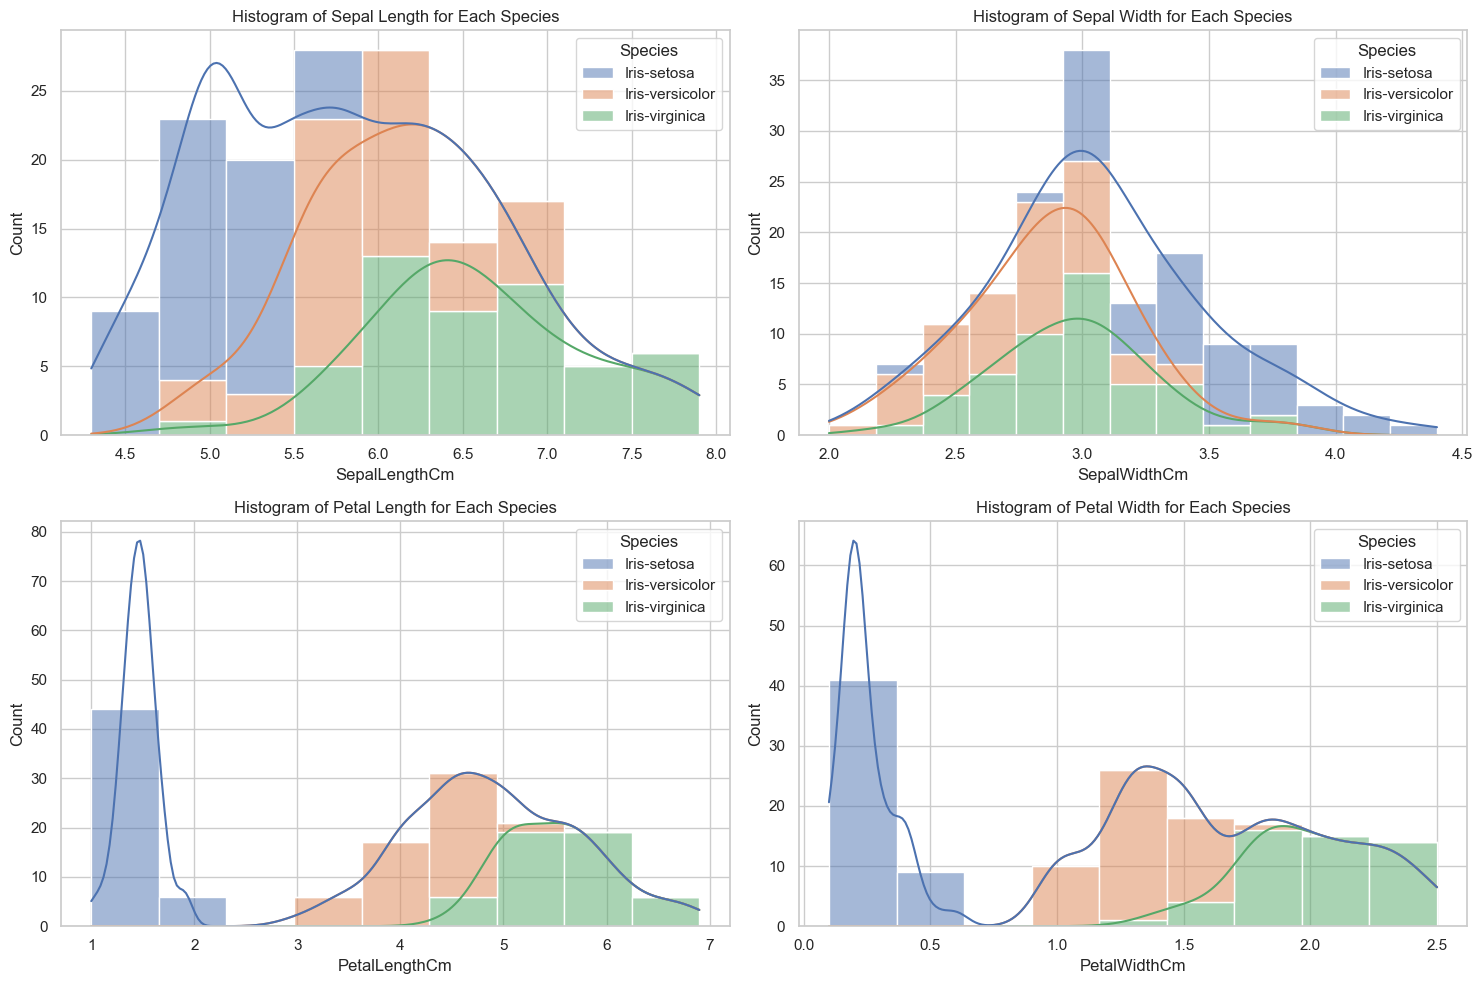

In [95]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Histogram of features for each species
plt.figure(figsize=(15, 10))

# Histograms for Sepal Length for each species
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='SepalLengthCm', hue='Species', kde=True, multiple="stack")
plt.title('Histogram of Sepal Length for Each Species')

# Histograms for Sepal Width for each species
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='SepalWidthCm', hue='Species', kde=True, multiple="stack")
plt.title('Histogram of Sepal Width for Each Species')

# Histograms for Petal Length for each species
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='PetalLengthCm', hue='Species', kde=True, multiple="stack")
plt.title('Histogram of Petal Length for Each Species')

# Histograms for Petal Width for each species
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='PetalWidthCm', hue='Species', kde=True, multiple="stack")
plt.title('Histogram of Petal Width for Each Species')

plt.tight_layout()
plt.show()


### Boxplot

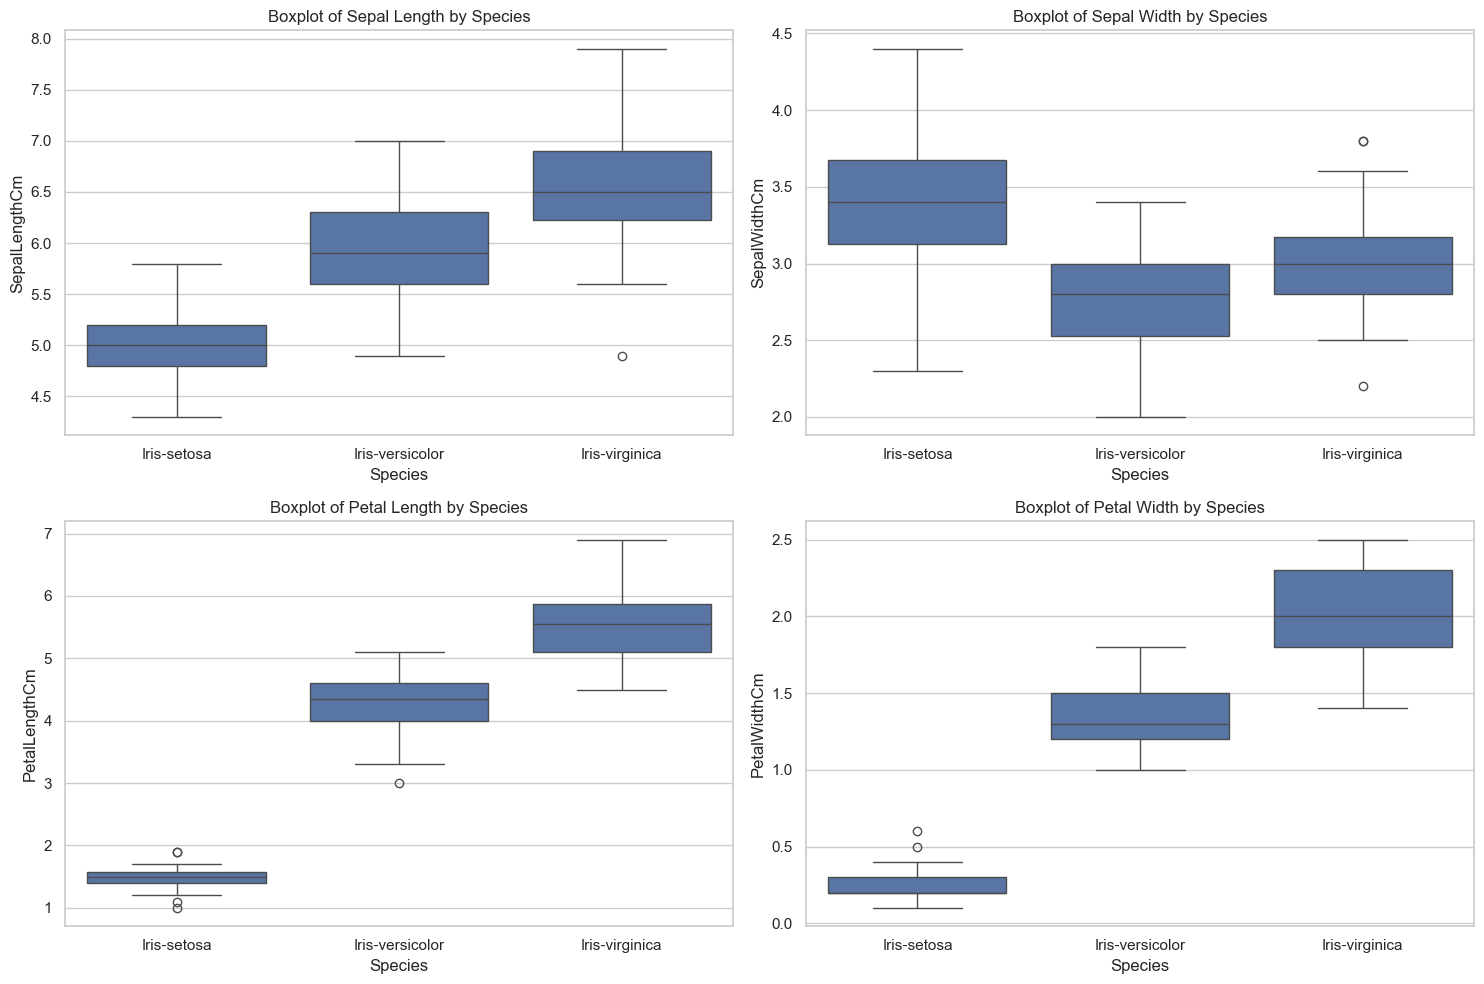

In [10]:
# 2. Boxplot for each feature to compare distributions by species
plt.figure(figsize=(15, 10))

# Boxplot for Sepal Length
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Boxplot of Sepal Length by Species')

# Boxplot for Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Boxplot of Sepal Width by Species')

# Boxplot for Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Boxplot of Petal Length by Species')

# Boxplot for Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Boxplot of Petal Width by Species')

plt.tight_layout()
plt.show()

### Pairplot

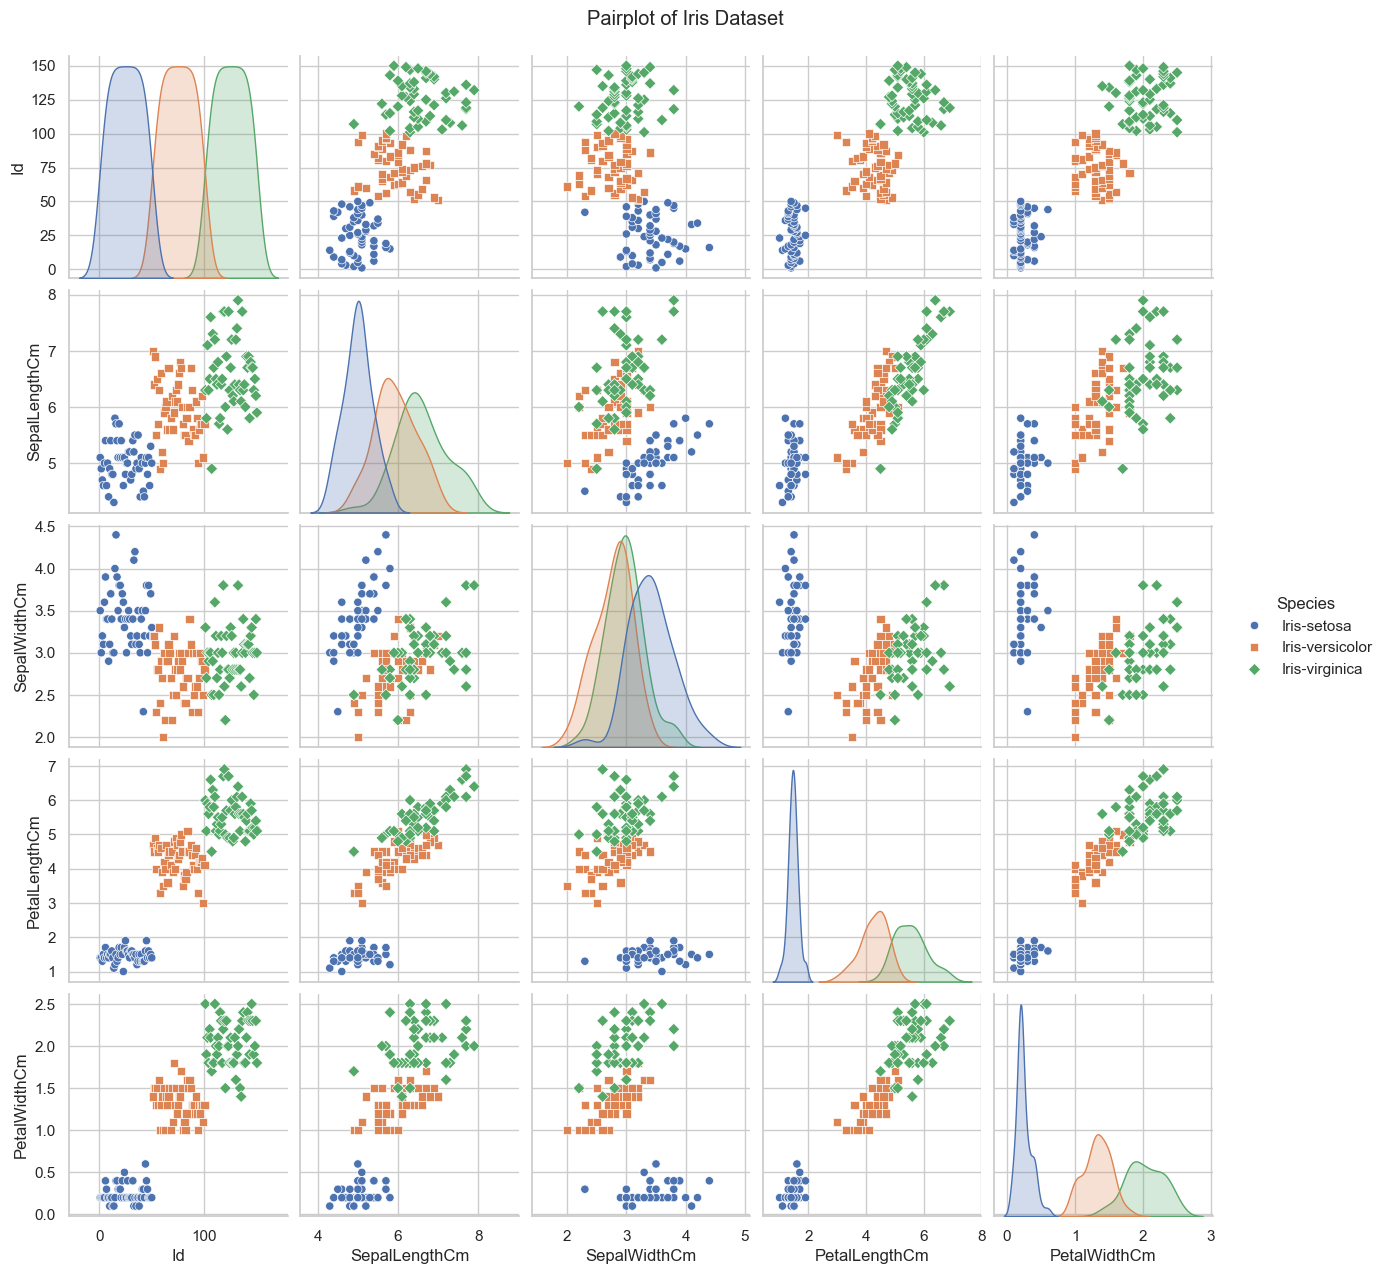

In [11]:
# 3. Pairplot to see relationships between features and species
sns.pairplot(df, hue="Species", markers=["o", "s", "D"], height=2.5)
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()
